Aus KAU, PS, PTD alle Daten einlesen und in eine Tabelle zusammenführen


In [ ]:
# @title
import gspread
import pandas as pd
from google.colab import auth
from google.auth import default
from datetime import datetime

# Authentifizierung für Google Sheets
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# Rollen-Spalten definieren
ps_role_columns = ['Maintenance', 'Kalibrierung', 'MDG EAM', 'MDG MM', 'Analyse Reporting',
                   'Ersatzteilmanagement', 'Engineering', 'Engineering - Capex']
role_columns = ['Maintenance', 'Analyse Reporting', 'Ersatzteilmanagement', 'Kalibrierung', 'EWM KAU', 'MDG EAM', 'MDG MM']

# KAU DATEN
spreadsheet_url_kau = 'https://docs.google.com/spreadsheets/d/1L37Bx2RKAH9I5OP3v-jG2LDjGzi3mdbiFBuz9FIflKM/edit?gid=2009282802#gid=2009282802'
sheet_kau = gc.open_by_url(spreadsheet_url_kau)
worksheet_kau = sheet_kau.get_worksheet(0)
data_KAU = pd.DataFrame(worksheet_kau.get_all_records())

# PTD DATEN
spreadsheet_url_ptd = 'https://docs.google.com/spreadsheets/d/1wguV7OQ-0VlNLO5PTFucD4mPnNiCdwzRmpSZA33rL1I/edit?gid=1165668754#gid=1165668754'
sheet_ptd = gc.open_by_url(spreadsheet_url_ptd)
worksheet_ptd = sheet_ptd.worksheet("PTD User")
data_ptd = pd.DataFrame(worksheet_ptd.get_all_records())

# PS DATEN
spreadsheet_url_ps = 'https://docs.google.com/spreadsheets/d/13ZOtTr2yKRPZnzsql8C8DOFaFzY8BXaculHtYliilhY/edit?pli=1&gid=734168569#gid=734168569'
sheet_ps = gc.open_by_url(spreadsheet_url_ps)
worksheet_ps = sheet_ps.worksheet("EndUserPS_Unique")
data_ps = pd.DataFrame(worksheet_ps.get_all_records())

# Funktion zur Zusammenführung von Rollen aus mehreren Spalten und Duplikate entfernen
def combine_roles(row, role_columns):
    roles = set()
    for col in role_columns:
        if col in row.index and isinstance(row[col], str):
            roles_in_cell = row[col].split(',')
            roles.update([r.strip() for r in roles_in_cell if r.strip().lower() != 'nan' and r.strip() != ''])
    return ', '.join(sorted(roles))

# Rollen für data_KAU zusammenführen
data_KAU['S4H_Roles'] = data_KAU.apply(lambda row: combine_roles(row, role_columns), axis=1)

# Rollen für data_ps zusammenführen
data_ps['S4H_Roles'] = data_ps.apply(lambda row: combine_roles(row, ps_role_columns), axis=1)

# Rollen für data_ptd zusammenführen
data_ptd['S4H_Roles'] = data_ptd['Maintenance'].apply(
    lambda x: ', '.join(sorted(set([r.strip() for r in x.split(',') if r.strip().lower() != 'nan' and r.strip() != '']))) if isinstance(x, str) else ''
)

# Gemeinsame Spaltennamen sicherstellen
columns_to_keep = ['Email','UserID', 'Name', 'Vorname', 'User - Organization', 'P30 Rollen Asset','P30 alle','User - Workday Position Title', 'User - Location','Abteilung' , 'Manager Name', 'S4H_Roles', 'Mapping erledigt']

data_KAU = data_KAU[columns_to_keep]
data_ps = data_ps[columns_to_keep]
data_ptd = data_ptd[columns_to_keep]

# DataFrames zusammenführen
combined_df = pd.concat([data_KAU, data_ps, data_ptd], ignore_index=True)

# Resultat anzeigen
from IPython.display import display
print("Kombinierte S4H-Rollen-Tabelle:")
display(combined_df)

# Optional: Speichern als Excel-Datei mit Zeitstempel
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
excel_filename = f"combined_s4h_roles_{timestamp}.xlsx"
csv_filename = f"combined_s4h_roles_{timestamp}.csv"

combined_df.to_excel(excel_filename, index=False)
combined_df.to_csv(csv_filename, index=False)

print(f"Die Excel-Datei '{excel_filename}' und die CSV-Datei '{csv_filename}' wurden erfolgreich gespeichert.")

Kombinierte S4H-Rollen-Tabelle:


,Email,UserID,Name,Vorname,User - Organization,P30 Rollen Asset,P30 alle,User - Workday Position Title,User - Location,Abteilung,Manager Name,S4H_Roles,Mapping erledigt
0,elena.ahlert@roche.com,AHLERTE,Ahlert,Elena,Small Volume Packaging,,,Produktionsexperte,Kaiseraugst FHLR,MMMCMB,"Tilly, Michael",,FALSE
1,demet.aksuenger@roche.com,AKSUNGED,Aksünger,Demet,Small Volume Packaging,CH-JE-0800_1090_NOT_REQUESTOR,"EU-JE-ALL_UNIVERSAL_BASIS, CH-JE-1500_UNIVERSA...",Compliance Expert,Kaiseraugst FHLR,MMMCMB,"Tilly, Michael",1201_General Assets Display,FALSE
2,adelina.aliu@roche.com,ALIUA3,Aliu,Adelina,Ocular Unit,,,Ocular Unit,Kaiseraugst FHLR,MMMCKB,"Ruf, Patrick",,TRUE
3,zeliha.atici@roche.com,aticiz,Atici,Zeliha,Small Volume Packaging,,,Produktionsexperte,Kaiseraugst FHLR,MMMCMB,"Tilly, Michael",,FALSE
4,mandy.baumert@roche.com,BAUMERTM,Baumert,Mandy,Small Volume Packaging,CH-JE-0800_1090_NOT_REQUESTOR,"EU-JE-ALL_UNIVERSAL_BASIS, EU-JE-1500_UNIVERSA...",Compliance Expert,Kaiseraugst FHLR,MMMCMB,"Tilly, Michael",1201_General Assets Display,FALSE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6978,tim.zoller@roche.com,ZOLLERT1,Zoller,Tim,Global Clinical Supply Chain Planning,,"CH-JE-1500_UNIVERSAL_DISPLAY_P, EU-JE-ALL_UNIV...",Strategy Lead - Study Planning,Kaiseraugst FHLR,MMDSP,"Volk, David",,FALSE
6979,peter.zschocke@roche.com,ZSCHOCKP,Zschocke,Peter,QC PL Team,,"EU-JE-ALL_UNIVERSAL_BASIS, CH-JE-1500_UNIVERSA...",Capability Lead,Basel Headquarter,MMDCAH,"Jung, Tobias",,FALSE
6980,pascal.zuber@roche.com,ZUBERP,Zuber,Pascal,Scale-up & Pilot Plant 1,"CH-JE-0800_1080_NOT_REQUESTOR, CH-JE-0800_1090...","EU-JE-ALL_UNIVERSAL_BASIS, CH-JE-1500_UNIVERSA...",Pilot Plant Specialist,Basel Headquarter,MMDCSC,"Niedermann, Katrin Monika","1201_Maintenance Requester_BSL, 1201_Master Da...",TRUE
6981,pasquale.zucale@roche.com,ZUCALEP,Zucale,Pasquale,Flex Team Lead & Operators,,,Production Specialist,Basel Headquarter,MMDCSC7B,"Herrmann, Werner",,FALSE


Die Excel-Datei 'combined_s4h_roles_20250121_152540.xlsx' und die CSV-Datei 'combined_s4h_roles_20250121_152540.csv' wurden erfolgreich gespeichert.


In [ ]:
import gspread
import pandas as pd
from google.colab import auth
from google.auth import default
from datetime import datetime

# Authentifizierung für Google Sheets
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# Rollen-Spalten definieren
ps_role_columns = ['Maintenance', 'Kalibrierung', 'MDG EAM', 'MDG MM', 'Analyse Reporting',
                   'Ersatzteilmanagement', 'Engineering', 'Engineering - Capex']
role_columns = ['Maintenance', 'Analyse Reporting', 'Ersatzteilmanagement', 'Kalibrierung', 'EWM KAU', 'MDG EAM', 'MDG MM']

# KAU DATEN
spreadsheet_url_kau = 'https://docs.google.com/spreadsheets/d/1L37Bx2RKAH9I5OP3v-jG2LDjGzi3mdbiFBuz9FIflKM/edit?gid=2009282802#gid=2009282802'
sheet_kau = gc.open_by_url(spreadsheet_url_kau)
worksheet_kau = sheet_kau.get_worksheet(0)
data_KAU = pd.DataFrame(worksheet_kau.get_all_records())
data_KAU['Source'] = 'KAU'

# PTD DATEN
spreadsheet_url_ptd = 'https://docs.google.com/spreadsheets/d/1wguV7OQ-0VlNLO5PTFucD4mPnNiCdwzRmpSZA33rL1I/edit?gid=1165668754#gid=1165668754'
sheet_ptd = gc.open_by_url(spreadsheet_url_ptd)
worksheet_ptd = sheet_ptd.worksheet("PTD User")
data_ptd = pd.DataFrame(worksheet_ptd.get_all_records())
data_ptd['Source'] = 'PTD'

# PS DATEN
spreadsheet_url_ps = 'https://docs.google.com/spreadsheets/d/13ZOtTr2yKRPZnzsql8C8DOFaFzY8BXaculHtYliilhY/edit?pli=1&gid=734168569#gid=734168569'
sheet_ps = gc.open_by_url(spreadsheet_url_ps)
worksheet_ps = sheet_ps.worksheet("EndUserPS_Unique")
data_ps = pd.DataFrame(worksheet_ps.get_all_records())
data_ps['Source'] = 'PS'

# Funktion zur Zusammenführung von Rollen aus mehreren Spalten und Duplikate entfernen
def combine_roles(row, role_columns):
    roles = set()
    for col in role_columns:
        if col in row.index and isinstance(row[col], str):
            roles_in_cell = row[col].split(',')
            roles.update([r.strip() for r in roles_in_cell if r.strip().lower() != 'nan' and r.strip() != ''])
    return ', '.join(sorted(roles))

# Rollen für data_KAU zusammenführen
data_KAU['S4H_Roles'] = data_KAU.apply(lambda row: combine_roles(row, role_columns), axis=1)

# Rollen für data_ps zusammenführen
data_ps['S4H_Roles'] = data_ps.apply(lambda row: combine_roles(row, ps_role_columns), axis=1)

# Rollen für data_ptd zusammenführen
data_ptd['S4H_Roles'] = data_ptd['Maintenance'].apply(
    lambda x: ', '.join(sorted(set([r.strip() for r in x.split(',') if r.strip().lower() != 'nan' and r.strip() != '']))) if isinstance(x, str) else ''
)

# Gemeinsame Spaltennamen sicherstellen
columns_to_keep = ['Email','UserID', 'Name', 'Vorname', 'User - Organization', 'P30 Rollen Asset','P30 alle','User - Workday Position Title', 'User - Location','Abteilung' , 'Manager Name', 'S4H_Roles', 'Mapping erledigt', 'Source']
data_ps = data_ps[columns_to_keep + ['Circle', 'Circle Lead']]
data_KAU = data_KAU[columns_to_keep]
data_ptd = data_ptd[columns_to_keep]

# Fehlende Spalten in data_KAU und data_ptd ergänzen
data_KAU['Circle'] = None
data_KAU['Circle Lead'] = None
data_ptd['Circle'] = None
data_ptd['Circle Lead'] = None

# DataFrames zusammenführen
combined_df = pd.concat([data_KAU, data_ps, data_ptd], ignore_index=True)

# Resultat anzeigen
from IPython.display import display
print("Kombinierte S4H-Rollen-Tabelle:")
display(combined_df)

# Optional: Speichern als Excel-Datei mit Zeitstempel
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
excel_filename = f"combined_s4h_roles_{timestamp}.xlsx"
csv_filename = f"combined_s4h_roles_{timestamp}.csv"

combined_df.to_excel(excel_filename, index=False)
combined_df.to_csv(csv_filename, index=False)

print(f"Die Excel-Datei '{excel_filename}' und die CSV-Datei '{csv_filename}' wurden erfolgreich gespeichert.")


Kombinierte S4H-Rollen-Tabelle:


<ipython-input-6-4b5e0fddab76>:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_KAU['Circle'] = None
<ipython-input-6-4b5e0fddab76>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_KAU['Circle Lead'] = None
<ipython-input-6-4b5e0fddab76>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

,Email,UserID,Name,Vorname,User - Organization,P30 Rollen Asset,P30 alle,User - Workday Position Title,User - Location,Abteilung,Manager Name,S4H_Roles,Mapping erledigt,Source,Circle,Circle Lead
0,elena.ahlert@roche.com,AHLERTE,Ahlert,Elena,Small Volume Packaging,,,Produktionsexperte,Kaiseraugst FHLR,MMMCMB,"Tilly, Michael",,FALSE,KAU,None,None
1,demet.aksuenger@roche.com,AKSUNGED,Aksünger,Demet,Small Volume Packaging,CH-JE-0800_1090_NOT_REQUESTOR,"EU-JE-ALL_UNIVERSAL_BASIS, CH-JE-1500_UNIVERSA...",Compliance Expert,Kaiseraugst FHLR,MMMCMB,"Tilly, Michael",1201_General Assets Display,FALSE,KAU,None,None
2,adelina.aliu@roche.com,ALIUA3,Aliu,Adelina,Ocular Unit,,,Ocular Unit,Kaiseraugst FHLR,MMMCKB,"Ruf, Patrick",,TRUE,KAU,None,None
3,zeliha.atici@roche.com,aticiz,Atici,Zeliha,Small Volume Packaging,,,Produktionsexperte,Kaiseraugst FHLR,MMMCMB,"Tilly, Michael",,FALSE,KAU,None,None
4,mandy.baumert@roche.com,BAUMERTM,Baumert,Mandy,Small Volume Packaging,CH-JE-0800_1090_NOT_REQUESTOR,"EU-JE-ALL_UNIVERSAL_BASIS, EU-JE-1500_UNIVERSA...",Compliance Expert,Kaiseraugst FHLR,MMMCMB,"Tilly, Michael",1201_General Assets Display,FALSE,KAU,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6978,tim.zoller@roche.com,ZOLLERT1,Zoller,Tim,Global Clinical Supply Chain Planning,,"CH-JE-1500_UNIVERSAL_DISPLAY_P, EU-JE-ALL_UNIV...",Strategy Lead - Study Planning,Kaiseraugst FHLR,MMDSP,"Volk, David",,FALSE,PTD,None,None
6979,peter.zschocke@roche.com,ZSCHOCKP,Zschocke,Peter,QC PL Team,,"EU-JE-ALL_UNIVERSAL_BASIS, CH-JE-1500_UNIVERSA...",Capability Lead,Basel Headquarter,MMDCAH,"Jung, Tobias",,FALSE,PTD,None,None
6980,pascal.zuber@roche.com,ZUBERP,Zuber,Pascal,Scale-up & Pilot Plant 1,"CH-JE-0800_1080_NOT_REQUESTOR, CH-JE-0800_1090...","EU-JE-ALL_UNIVERSAL_BASIS, CH-JE-1500_UNIVERSA...",Pilot Plant Specialist,Basel Headquarter,MMDCSC,"Niedermann, Katrin Monika","1201_Maintenance Requester_BSL, 1201_Master Da...",TRUE,PTD,None,None
6981,pasquale.zucale@roche.com,ZUCALEP,Zucale,Pasquale,Flex Team Lead & Operators,,,Production Specialist,Basel Headquarter,MMDCSC7B,"Herrmann, Werner",,FALSE,PTD,None,None


Die Excel-Datei 'combined_s4h_roles_20250121_154435.xlsx' und die CSV-Datei 'combined_s4h_roles_20250121_154435.csv' wurden erfolgreich gespeichert.


In [ ]:
print(combined_df.head())

                       Email    UserID      Name  Vorname  \
0     elena.ahlert@roche.com   AHLERTE    Ahlert    Elena   
1  demet.aksuenger@roche.com  AKSUNGED  Aksünger    Demet   
2     adelina.aliu@roche.com    ALIUA3      Aliu  Adelina   
3     zeliha.atici@roche.com    aticiz     Atici   Zeliha   
4    mandy.baumert@roche.com  BAUMERTM   Baumert    Mandy   

      User - Organization               P30 Rollen Asset  \
0  Small Volume Packaging                                  
1  Small Volume Packaging  CH-JE-0800_1090_NOT_REQUESTOR   
2             Ocular Unit                                  
3  Small Volume Packaging                                  
4  Small Volume Packaging  CH-JE-0800_1090_NOT_REQUESTOR   

                                            P30 alle  \
0                                                      
1  EU-JE-ALL_UNIVERSAL_BASIS, CH-JE-1500_UNIVERSA...   
2                                                      
3                                               

In [ ]:

# Optional: Speichern als Excel-Datei mit Zeitstempel
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
excel_filename = f"combined_s4h_roles_{timestamp}.xlsx"
csv_filename = f"combined_s4h_roles_{timestamp}.csv"

combined_df.to_excel(excel_filename, index=False)
combined_df.to_csv(csv_filename, index=False)

pri

Die Excel-Datei 'combined_s4h_roles_20250121_154618.xlsx' und die CSV-Datei 'combined_s4h_roles_20250121_154618.csv' wurden erfolgreich gespeichert.


In [ ]:
# @title
# prompt: hole mir aus der Tabelle die Namen der Personen die folgende Rolle in Spalte "S4H_Roles" in dem dataframe "combined_df" zugeteilt bekommen haben: '1201_Local Master Data Maintainer_BSL' und '1201_Local Master Data Maintainer_KAU'

# Filter the DataFrame for the specified roles
filtered_df = combined_df[
    combined_df['S4H_Roles'].str.contains('1201_Local Master Data Maintainer_KAU', na=False) |
    combined_df['S4H_Roles'].str.contains('1201_Local Master Data Maintainer_BSL', na=False)]

# Extract the names
names = filtered_df['Name'].tolist()

# Print the names
# names #Ausgabe stillgelegt nur bei Bedarf

['Ackerl',
 'Bächtold',
 'Becker',
 'Blanck',
 'Böswald',
 'Bytyçi',
 'Domnig',
 'Frey',
 'Glatt',
 'Kälin',
 'Kälin',
 'Leimstoll',
 'Oser',
 'Ringele',
 'Schmidt',
 'Schüpbach',
 'Stauber',
 'Zmed']

In [ ]:
# @title
# Optional: Speichern als Excel-Datei
#combined_df.to_excel("combined_s4h_roles.xlsx", index=False)
#print("Die Excel-Datei 'combined_s4h_roles.xlsx' wurde erfolgreich gespeichert.")

##

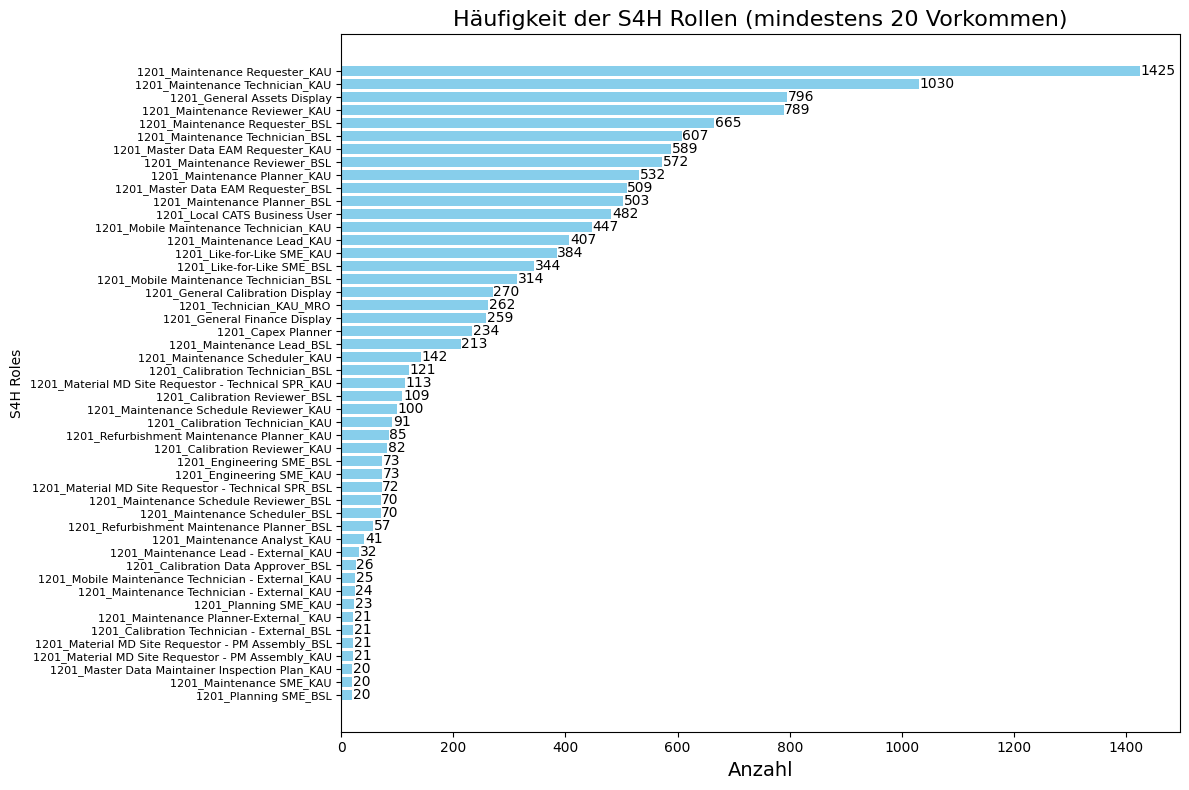

In [ ]:
# @title
import matplotlib.pyplot as plt
from collections import Counter

# Mindestanzahl für Rollen als Variable definieren
min_count = 20

# Rollen aus der Spalte 'S4H_Roles' extrahieren und zählen
all_roles = []
for roles in combined_df['S4H_Roles']:
    if isinstance(roles, str):
        all_roles.extend([role.strip() for role in roles.split(',') if role.strip()])

role_counts = Counter(all_roles)

# Rollen filtern, die mindestens 'min_count'-mal vorkommen
filtered_roles = {role: count for role, count in role_counts.items() if count >= min_count}

# Daten für das Diagramm vorbereiten
sorted_roles = sorted(filtered_roles.items(), key=lambda x: x[1], reverse=True)
roles, counts = zip(*sorted_roles)

# Balkendiagramm erstellen
plt.figure(figsize=(12, 8))
bars = plt.barh(roles, counts, color='skyblue')
plt.xlabel('Anzahl', fontsize=14)
plt.ylabel('S4H Roles', fontsize=10)
plt.title(f'Häufigkeit der S4H Rollen (mindestens {min_count} Vorkommen)', fontsize=16)
plt.gca().invert_yaxis()  # Reihenfolge umkehren, damit die häufigste Rolle oben ist
plt.yticks(fontsize=8)  # Schriftgröße der Rollennamen anpassen

# Balken beschriften
for bar, count in zip(bars, counts):
    plt.text(count + 1, bar.get_y() + bar.get_height() / 2, str(count), va='center', fontsize=10)

# Diagramm anzeigen
plt.tight_layout()
plt.show()


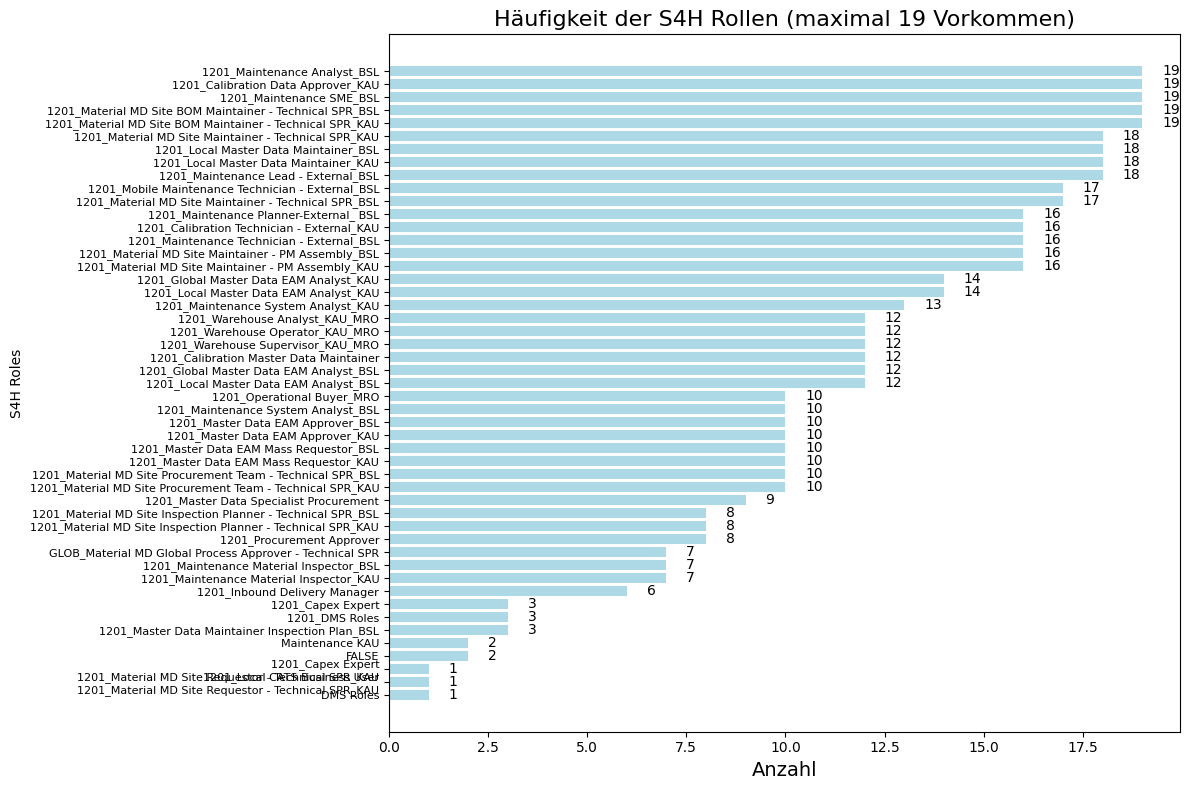

In [ ]:
# @title
import matplotlib.pyplot as plt
from collections import Counter

# Maximalanzahl für Rollen automatisch aus min_count der vorherigen Zelle definieren
max_count = min_count - 1

# Rollen aus der Spalte 'S4H_Roles' extrahieren und zählen
all_roles = []
for roles in combined_df['S4H_Roles']:
    if isinstance(roles, str):
        all_roles.extend([role.strip() for role in roles.split(',') if role.strip()])

role_counts = Counter(all_roles)

# Rollen filtern, die maximal 'max_count'-mal vorkommen
filtered_roles = {role: count for role, count in role_counts.items() if count <= max_count}

# Daten für das Diagramm vorbereiten
sorted_roles = sorted(filtered_roles.items(), key=lambda x: x[1], reverse=True)
roles, counts = zip(*sorted_roles) if sorted_roles else ([], [])

# Balkendiagramm erstellen
plt.figure(figsize=(12, 8))
bars = plt.barh(roles, counts, color='lightblue')
plt.xlabel('Anzahl', fontsize=14)
plt.ylabel('S4H Roles', fontsize=10)
plt.title(f'Häufigkeit der S4H Rollen (maximal {max_count} Vorkommen)', fontsize=16)
plt.gca().invert_yaxis()  # Reihenfolge umkehren, damit die häufigste Rolle oben ist
plt.yticks(fontsize=8)  # Schriftgröße der Rollennamen anpassen

# Balken beschriften
for bar, count in zip(bars, counts):
    plt.text(count + 0.5, bar.get_y() + bar.get_height() / 2, str(count), va='center', fontsize=10)

# Diagramm anzeigen
plt.tight_layout()
plt.show()


## Rollen mit grosser Anzahl
(PS, PTD, PTM) zusammen

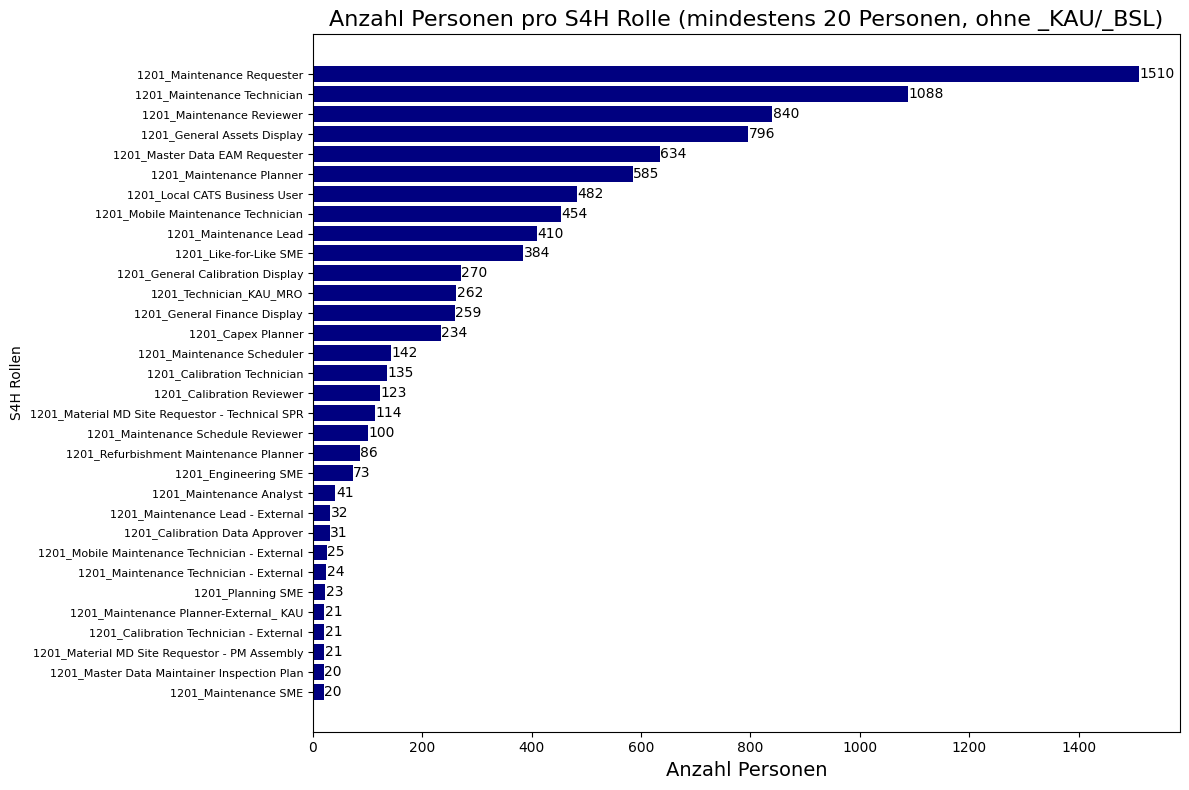

In [ ]:
# @title
import matplotlib.pyplot as plt
from collections import defaultdict
import re

# Mindestanzahl für Rollen als Variable definieren
min_count = 20

# Rollen und UserIDs extrahieren und bereinigen
role_person_mapping = defaultdict(set)

for _, row in combined_df.iterrows():
    if isinstance(row['S4H_Roles'], str) and isinstance(row['UserID'], str):
        roles = [re.sub(r'_(KAU|BSL)$', '', role.strip()) for role in row['S4H_Roles'].split(',') if role.strip()]
        for role in roles:
            role_person_mapping[role].add(row['UserID'])

# Zählen, wie viele Personen jede Rolle haben
role_person_counts = {role: len(users) for role, users in role_person_mapping.items()}

# Rollen filtern, die mindestens 'min_count'-mal vorkommen
filtered_roles = {role: count for role, count in role_person_counts.items() if count >= min_count}

# Daten für das Diagramm vorbereiten
sorted_roles = sorted(filtered_roles.items(), key=lambda x: x[1], reverse=True)
roles, counts = zip(*sorted_roles) if sorted_roles else ([], [])

# Balkendiagramm erstellen
plt.figure(figsize=(12, 8))
bars = plt.barh(roles, counts, color='navy')
plt.xlabel('Anzahl Personen', fontsize=14)
plt.ylabel('S4H Rollen', fontsize=10)
plt.title(f'Anzahl Personen pro S4H Rolle (mindestens {min_count} Personen, ohne _KAU/_BSL)', fontsize=16)
plt.gca().invert_yaxis()  # Reihenfolge umkehren, damit die häufigste Rolle oben ist
plt.yticks(fontsize=8)  # Schriftgröße der Rollennamen anpassen

# Balken beschriften
for bar, count in zip(bars, counts):
    plt.text(count + 1, bar.get_y() + bar.get_height() / 2, str(count), va='center', fontsize=10)

# Diagramm anzeigen
plt.tight_layout()
plt.show()


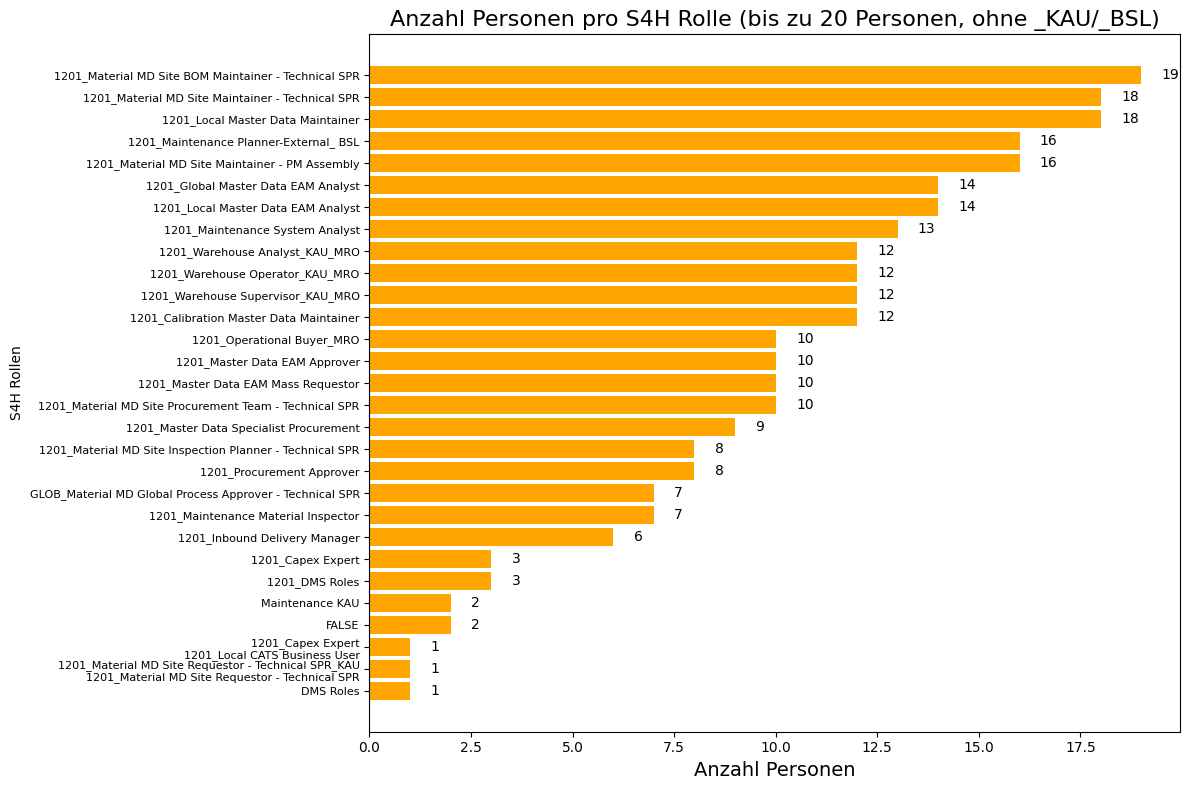

In [ ]:
# @title
import matplotlib.pyplot as plt
from collections import defaultdict
import re

# Rollen und UserIDs extrahieren und bereinigen
role_person_mapping = defaultdict(set)

for _, row in combined_df.iterrows():
    if isinstance(row['S4H_Roles'], str) and isinstance(row['UserID'], str):
        roles = [re.sub(r'_(KAU|BSL)$', '', role.strip()) for role in row['S4H_Roles'].split(',') if role.strip()]
        for role in roles:
            role_person_mapping[role].add(row['UserID'])

# Zählen, wie viele Personen jede Rolle haben
role_person_counts = {role: len(users) for role, users in role_person_mapping.items()}

# Rollen filtern, die **bis zu 20 Personen** betreffen
filtered_roles = {role: count for role, count in role_person_counts.items() if count <= 19}

# Daten für das Diagramm vorbereiten
sorted_roles = sorted(filtered_roles.items(), key=lambda x: x[1], reverse=True)
roles, counts = zip(*sorted_roles) if sorted_roles else ([], [])

# Balkendiagramm erstellen
plt.figure(figsize=(12, 8))
bars = plt.barh(roles, counts, color='orange')
plt.xlabel('Anzahl Personen', fontsize=14)
plt.ylabel('S4H Rollen', fontsize=10)
plt.title(f'Anzahl Personen pro S4H Rolle (bis zu 20 Personen, ohne _KAU/_BSL)', fontsize=16)
plt.gca().invert_yaxis()  # Reihenfolge umkehren, damit die häufigste Rolle oben ist
plt.yticks(fontsize=8)  # Schriftgröße der Rollennamen anpassen

# Balken beschriften
for bar, count in zip(bars, counts):
    plt.text(count + 0.5, bar.get_y() + bar.get_height() / 2, str(count), va='center', fontsize=10)

# Diagramm anzeigen
plt.tight_layout()
plt.show()


---
Code ggf optimieren, dass Rollen die Gleich aber nur auf BSL oder KAU enden nicht 2-fach gezählt werden

## Rollen mit geringer Häufigkeit
BSL KAU zusammen (PS, PTM, PTD)

Insgesamt gelistete Organisationen: 370
Organisationen nicht in der Grafik enthalten: 305
Rollen, die nicht gezeigt werden: 3204


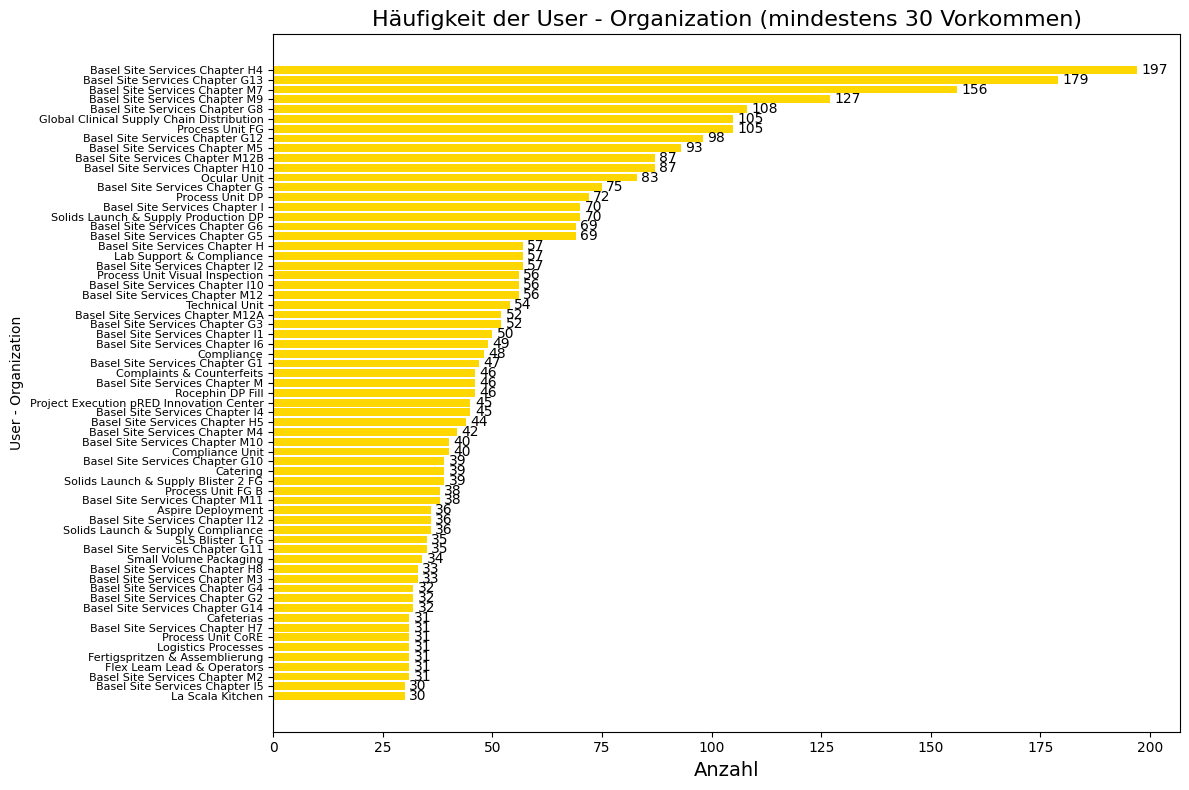

In [ ]:
# @title
import matplotlib.pyplot as plt

# Mindestanzahl für die Anzeige definieren
min_organization_count = 30

# Häufigkeit der "User - Organization" zählen
organization_counts = combined_df['User - Organization'].value_counts()

# Organisationen filtern, die mindestens 'min_organization_count'-mal vorkommen
filtered_organizations = organization_counts[organization_counts >= min_organization_count]
remaining_organizations = organization_counts[organization_counts < min_organization_count]

# Daten für das Diagramm vorbereiten
sorted_organizations = filtered_organizations.index.tolist()
counts = filtered_organizations.values

# Balkendiagramm erstellen
plt.figure(figsize=(12, 8))
bars = plt.barh(sorted_organizations, counts, color='gold')
plt.xlabel('Anzahl', fontsize=14)
plt.ylabel('User - Organization', fontsize=10)
plt.title(f'Häufigkeit der User - Organization (mindestens {min_organization_count} Vorkommen)', fontsize=16)
plt.gca().invert_yaxis()  # Reihenfolge umkehren, damit die häufigste Organisation oben ist
plt.yticks(fontsize=8)  # Schriftgröße der Organisationsnamen anpassen

# Balken beschriften
for bar, count in zip(bars, counts):
    plt.text(count + 1, bar.get_y() + bar.get_height() / 2, str(count), va='center', fontsize=10)

# Informationen zu nicht angezeigten Organisationen
total_organizations = len(organization_counts)
excluded_organizations = len(remaining_organizations)
total_excluded_roles = remaining_organizations.sum()

print(f"Insgesamt gelistete Organisationen: {total_organizations}")
print(f"Organisationen nicht in der Grafik enthalten: {excluded_organizations}")
print(f"Rollen, die nicht gezeigt werden: {total_excluded_roles}")

# Diagramm anzeigen
plt.tight_layout()
plt.show()


#Detailauswertung für ausgewählte Unit

Im Feld Cluster den Bereich wählen und es wird eine detaillierte Aufstellung der Rollen in dem bestimmten Bereich grafisch dargestellt

In [ ]:
# @title
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd

# Cluster-Daten
clusters = {
    "Technical Unit": ['Technical Unit', 'Value Stream Vials Speed Technical Unit FG',
                       'Technik', 'Technical Unit E2E', 'Solids Launch & Supply Technical Unit DP','Solids Launch & Supply Technical Unit FG'
    ],
    "QA": ['QA Solids', 'QA for QC', 'QA Vials Speed', 'QA Vials Volume', 'QA Rocephin', 'QA for Functions',
           'QA Syringes & Devices', 'QA Logistics',
           'Quality Systems', 'Quality Kaiseraugst', 'Quality Compliance', 'Internal E2E Quality Operations', 'QA for Functions B', 'IMP Quality Operations Basel&Kau', 'QS QV'
    ],
    "QC": ['QC Release & ID K', 'QC Release & ID St', 'BBK QC', 'Sample Mgmt BS', 'QC Support BS & KAU', 'ASAT', 'QC Sample Mgmt KAU',
           'QC mEMT Basel', 'QC mEMT Kaiseraugst', 'Bioassay',
           'Microbiology', 'Non-sterile Materials & Lab-Sterilisation Processes', 'SM HPLC, KF, Disso'
    ],
    "Produktion": ['Rocephin DP Fill', 'Process Unit FG', 'Process Unit Visual Inspection', 'Kaiseraugst Drug Product Manufacturing',
                   'Solids Launch & Supply Blister 2 FG', 'Process Unit DP', 'Solids Launch & Supply Production DP', 'Vials Speed', 'SLS Blister 1 FG', 'Blister',
                   'Solids Launch & Supply Blister 1 FG', 'Rocephin Manufacturing KAU',
                   'Vials Volume', 'Process Unit Fertigspritzen', 'Fertigspritzen & Assemblierung', 'Solids Launch & Supply', 'Solids Launch & Supply Print Service & Support'
    ],
    "ES&T": ['Utilities', 'Maintenance Operations', 'Reliability', 'Unit Lead Asset Process Validation 1', 'Unit Lead Asset Process Validation 2',
             'Enabling Science & Operational Support', 'Engineering Science and Technology', 'CoE Reinigungsvalidierung', 'Monitoring'
    ]
}

# Dropdown für Cluster-Auswahl
cluster_dropdown = widgets.Dropdown(
    options=clusters.keys(),
    value=None,
    description='Cluster:',
    style={'description_width': 'initial'}
)

# Button zur Anzeige
def show_cluster_data(change):
    selected_cluster = cluster_dropdown.value
    if not selected_cluster:
        print("Bitte wählen Sie ein Cluster aus.")
        return

    organizations = clusters[selected_cluster]
    filtered_data = combined_df[combined_df['User - Organization'].isin(organizations)]
    counts = filtered_data['User - Organization'].value_counts()

    # Balkendiagramm erstellen
    plt.figure(figsize=(10, 6))
    bars = plt.barh(counts.index, counts.values, color='skyblue')
    plt.xlabel('Anzahl der Rollen', fontsize=14)
    plt.ylabel('User - Organization', fontsize=10)
    plt.title(f'Rollen in Cluster: {selected_cluster}', fontsize=16)
    plt.gca().invert_yaxis()

    # Balken beschriften
    for bar, count in zip(bars, counts.values):
        plt.text(count + 1, bar.get_y() + bar.get_height() / 2, str(count), va='center', fontsize=10)

    plt.tight_layout()
    plt.show()

    # Detailgrafiken für Rollen
    for organization in organizations:
        org_data = filtered_data[filtered_data['User - Organization'] == organization]
        if not org_data.empty:
            role_counts = org_data['S4H_Roles'].str.split(',').explode().value_counts()
            manager_names = org_data['Manager Name'].unique()
            total_roles = role_counts.sum()
            total_users = org_data['UserID'].nunique()

            # Detailbalkendiagramm für Rollen
            plt.figure(figsize=(10, 6))
            plt.barh(role_counts.index, role_counts.values, color='lightcoral')
            plt.xlabel('Anzahl', fontsize=14)
            plt.ylabel('Roles', fontsize=10)
            plt.title(f'Rollen in {organization} (Manager: {", ".join(manager_names)}) - Gesamt: {total_roles}', fontsize=14)
            plt.gca().invert_yaxis()

            # Balken beschriften
            for bar, count in zip(plt.barh(role_counts.index, role_counts.values), role_counts.values):
                plt.text(count + 1, bar.get_y() + bar.get_height() / 2, str(count), va='center', fontsize=10)

            plt.tight_layout()
            plt.show()

            # Anzahl der Mitarbeiter anzeigen
            print(f"Anzahl der Mitarbeiter in {organization}: {total_users}")
            print(" ")

button = widgets.Button(description="Anzeigen")
button.on_click(show_cluster_data)

# Widgets anzeigen
display(cluster_dropdown, button)

Dropdown(description='Cluster:', options=('Technical Unit', 'QA', 'QC', 'Produktion', 'ES&T'), style=Descripti…

Button(description='Anzeigen', style=ButtonStyle())

In [ ]:
# @title
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict

# Cluster-Daten
clusters = {
    "Technical Unit": [
        'Technical Unit', 'Value Stream Vials Speed Technical Unit FG',
        'Technik', 'Technical Unit E2E', 'Solids Launch & Supply Technical Unit DP',
        'Solids Launch & Supply Technical Unit FG'
    ],
    "QA": [
        'QA Solids', 'QA for QC', 'QA Vials Speed', 'QA Vials Volume', 'QA Rocephin', 'QA for Functions',
        'QA Syringes & Devices', 'QA Logistics',
        'Quality Systems', 'Quality Kaiseraugst', 'Quality Compliance', 'Internal E2E Quality Operations',
        'QA for Functions B', 'IMP Quality Operations Basel&Kau', 'QS QV'
    ],
    "QC": [
        'QC Release & ID K', 'QC Release & ID St', 'BBK QC', 'Sample Mgmt BS', 'QC Support BS & KAU',
        'ASAT', 'QC Sample Mgmt KAU', 'QC mEMT Basel', 'QC mEMT Kaiseraugst', 'Bioassay',
        'Microbiology', 'Non-sterile Materials & Lab-Sterilisation Processes', 'SM HPLC, KF, Disso'
    ],
    "Produktion": [
        'Rocephin DP Fill', 'Process Unit FG', 'Process Unit Visual Inspection', 'Kaiseraugst Drug Product Manufacturing',
        'Solids Launch & Supply Blister 2 FG', 'Process Unit DP', 'Solids Launch & Supply Production DP', 'Vials Speed',
        'SLS Blister 1 FG', 'Blister', 'Solids Launch & Supply Blister 1 FG', 'Rocephin Manufacturing KAU',
        'Vials Volume', 'Process Unit Fertigspritzen', 'Fertigspritzen & Assemblierung', 'Solids Launch & Supply',
        'Solids Launch & Supply Print Service & Support'
    ],
    "ES&T": [
        'Utilities', 'Maintenance Operations', 'Reliability', 'Unit Lead Asset Process Validation 1',
        'Unit Lead Asset Process Validation 2', 'Enabling Science & Operational Support',
        'Engineering Science and Technology', 'CoE Reinigungsvalidierung', 'Monitoring'
    ]
}

# Dropdown für Cluster-Auswahl
cluster_dropdown = widgets.Dropdown(
    options=clusters.keys(),
    value=None,
    description='Cluster:',
    style={'description_width': 'initial'}
)

# Funktion zur Anzeige der Daten
def show_cluster_data(change):
    selected_cluster = cluster_dropdown.value
    if not selected_cluster:
        print("Bitte wählen Sie ein Cluster aus.")
        return

    organizations = clusters[selected_cluster]
    filtered_data = combined_df[combined_df['User - Organization'].isin(organizations)]

    if filtered_data.empty:
        print(f"Keine Daten für das ausgewählte Cluster: {selected_cluster}")
        return

    # Übersichtsgrafik erstellen
    counts = filtered_data['User - Organization'].value_counts()
    plt.figure(figsize=(10, 6))
    bars = plt.barh(counts.index, counts.values, color='skyblue')
    plt.xlabel('Anzahl der Rollen', fontsize=14)
    plt.ylabel('User - Organization', fontsize=10)
    plt.title(f'Rollen in Cluster: {selected_cluster}', fontsize=16)
    plt.gca().invert_yaxis()

    for bar, count in zip(bars, counts.values):
        plt.text(count + 1, bar.get_y() + bar.get_height() / 2, str(count), va='center', fontsize=10)

    plt.tight_layout()
    plt.show()

    # Detailgrafiken und Informationen pro Organisation
    for organization in organizations:
        org_data = filtered_data[filtered_data['User - Organization'] == organization]
        if org_data.empty:
             continue

        role_counts = org_data['S4H_Roles'].str.split(',').explode().value_counts()
        manager_names = org_data['Manager Name'].unique()
        total_roles = role_counts.sum()
        total_users = org_data['UserID'].nunique()

    # Manager-Namen zu einem String formatieren
        manager_names_str = ', '.join(manager_names)

    # Detailbalkendiagramm für Rollen
        plt.figure(figsize=(10, 6))
        plt.barh(role_counts.index, role_counts.values, color='lightcoral')
        plt.xlabel('Anzahl', fontsize=14)
        plt.ylabel('Roles', fontsize=10)
        plt.title(f'Rollen in {organization} (Manager: {manager_names_str}) - Gesamt: {total_roles}', fontsize=14)
        plt.gca().invert_yaxis()


        # Schriftgröße der Y-Achsen-Beschriftung anpassen
        plt.yticks(fontsize=6)  # Schriftgröße auf 8 einstellen

        for bar, count in zip(plt.barh(role_counts.index, role_counts.values), role_counts.values):
            plt.text(count + 1, bar.get_y() + bar.get_height() / 2, str(count), va='center', fontsize=10)

        plt.tight_layout()
        plt.show()


        # Anzahl der Mitarbeiter anzeigen
        print(f"Anzahl der Mitarbeiter in {organization}: {total_users}\n")

# Button zur Anzeige
button = widgets.Button(description="Anzeigen")
button.on_click(show_cluster_data)

# Widgets anzeigen
display(cluster_dropdown, button)


Dropdown(description='Cluster:', options=('Technical Unit', 'QA', 'QC', 'Produktion', 'ES&T'), style=Descripti…

Button(description='Anzeigen', style=ButtonStyle())

# Status erledigte

### Sind die Rollen, welche als "erledigt" markiert wurden

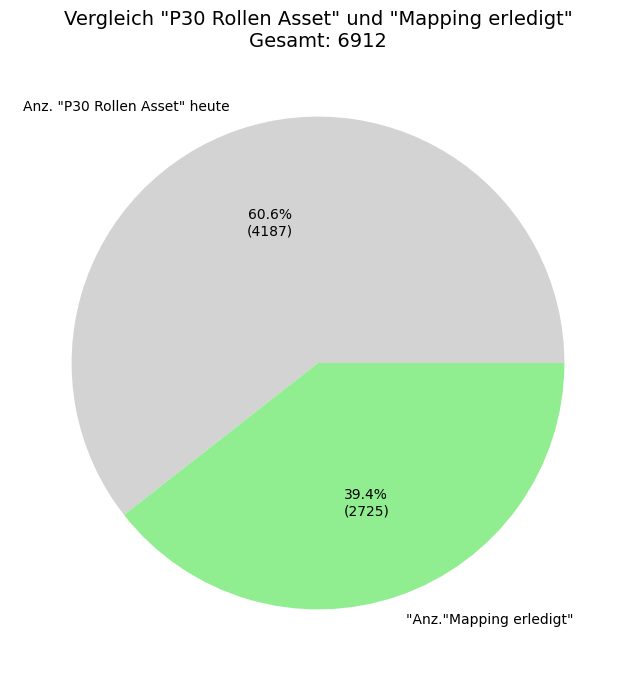

In [ ]:
# @title
import matplotlib.pyplot as plt

# Daten filtern und zählen
non_empty_p30_roles = combined_df['P30 Rollen Asset'].apply(lambda x: isinstance(x, str) and x.strip() != '').sum()  # Zellen, die nicht leer sind
true_mapping = (combined_df['Mapping erledigt'] == 'TRUE').sum()  # Zellen mit "TRUE"

total_cells = non_empty_p30_roles + true_mapping

# Daten für das Kreisdiagramm vorbereiten
labels = ['Anz. "P30 Rollen Asset" heute', '"Anz."Mapping erledigt"']
values = [non_empty_p30_roles, true_mapping]
percentages = [v / total_cells * 100 for v in values]

# Kreisdiagramm erstellen
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct=lambda p: f'{p:.1f}%\n({int(p * total_cells / 100)})', colors=['lightgrey', 'lightgreen'])
plt.title(f'Vergleich "P30 Rollen Asset" und "Mapping erledigt"\nGesamt: {total_cells}', fontsize=14)
plt.show()



## Sind die P30 Rollen, die wir aufgrund der Daten aus P30 zählen

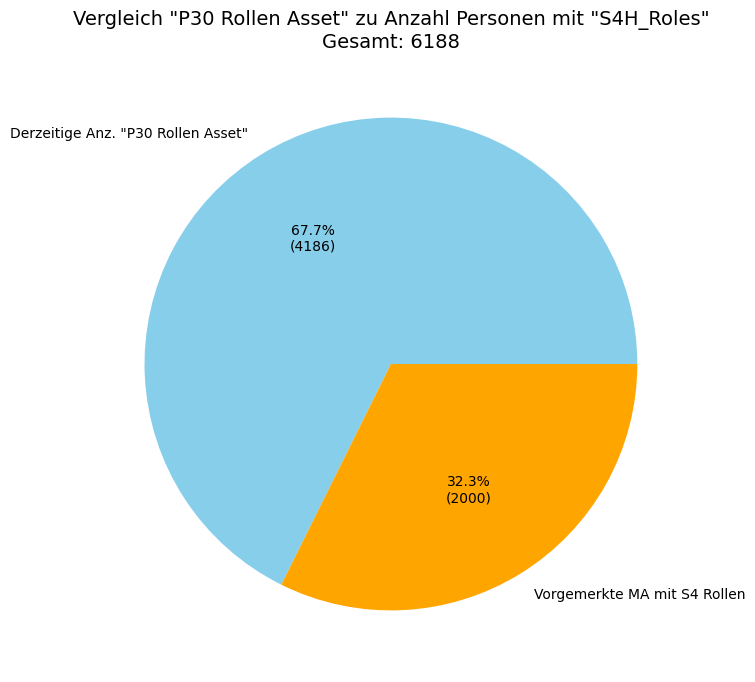

In [ ]:
# @title
import matplotlib.pyplot as plt

# Daten filtern und zählen
non_empty_p30_roles = combined_df['P30 Rollen Asset'].apply(lambda x: isinstance(x, str) and x.strip() != '').sum()  # Zellen, die nicht leer sind
non_empty_s4h_roles = combined_df['S4H_Roles'].apply(lambda x: isinstance(x, str) and x.strip() != '').sum()  # Zellen, die nicht leer sind

total_cells = non_empty_p30_roles + non_empty_s4h_roles

# Daten für das Kreisdiagramm vorbereiten
labels = ['Derzeitige Anz. "P30 Rollen Asset"', 'Vorgemerkte MA mit S4 Rollen']
values = [non_empty_p30_roles, non_empty_s4h_roles]
percentages = [v / total_cells * 100 for v in values]

# Kreisdiagramm erstellen
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct=lambda p: f'{p:.1f}%\n({int(p * total_cells / 100)})', colors=['skyblue', 'orange'])
plt.title(f'Vergleich "P30 Rollen Asset" zu Anzahl Personen mit "S4H_Roles"\nGesamt: {total_cells}', fontsize=14)
plt.show()

---
-
-
-
-
-
-
---

#EXPORT df für Upload

In der ersten Zelle wurde bereits bereinigt und duplikate entfernt. Nun müssen nur noch die relevanten Spalten und Zeilen heraiusgefahren werden in in einen neuen DataFrame geschrieben werden.

*RM_Exp_P2rfa_df*



In [ ]:
# @title
# prompt: erstelle aud dem dataframe combined_df ein neues zu exportierendes RM_Exp_P2rfa_df. es soll folgende Spalten enthalten: "UserId", "Name", "Vormname", S4H_Roles". Es soll nur die Zeilen enthalten, welche in "S4H_Roles" einen Inhalt haben. Zusätzlich soll eine neuen Spalte erzeugt werden, die "Name, Vorname" enthält. Nach diesem Muster: "Name, Vorname". Werte aus wieviel Zeilen enthalten sind und wieviel durch komma getrennte Zeichenketten (also Rollen) insgesamt in den Zellen in Spalte "S4H_Roles" enthalten sind

# Erstelle einen neuen DataFrame mit den ausgewählten Spalten
RM_Exp_P2rfa_df = combined_df[["Email","UserID", "Name", "Vorname", "S4H_Roles"]].copy()

# Filtere Zeilen, in denen die Spalte "S4H_Roles" nicht leer ist
RM_Exp_P2rfa_df = RM_Exp_P2rfa_df[RM_Exp_P2rfa_df["S4H_Roles"].notna()]
RM_Exp_P2rfa_df = RM_Exp_P2rfa_df[RM_Exp_P2rfa_df["S4H_Roles"] != ""]

# Erstelle die neue Spalte "Name, Vorname"
RM_Exp_P2rfa_df["Name, Vorname"] = RM_Exp_P2rfa_df["Name"] + ", " + RM_Exp_P2rfa_df["Vorname"]

# Berechne die Anzahl der Zeilen und Rollen
anzahl_zeilen = len(RM_Exp_P2rfa_df)
anzahl_rollen = 0
for roles in RM_Exp_P2rfa_df["S4H_Roles"]:
  anzahl_rollen += len(roles.split(','))
print("___________________________________________")
print(f"Anzahl Personen mit Rollen: {anzahl_zeilen}")
print(f"Anzahl Rollen insgesamt.  : {anzahl_rollen}")

# Zeige die ersten Zeilen des neuen DataFrame an (optional)
RM_Exp_P2rfa_df

___________________________________________
Anzahl Personen mit Rollen: 2001
Anzahl Rollen insgesamt.  : 13756


,Email,UserID,Name,Vorname,S4H_Roles,"Name, Vorname"
1,demet.aksuenger@roche.com,AKSUNGED,Aksünger,Demet,1201_General Assets Display,"Aksünger, Demet"
4,mandy.baumert@roche.com,BAUMERTM,Baumert,Mandy,1201_General Assets Display,"Baumert, Mandy"
7,perica.calic@roche.com,CALICP,Calic,Perica,1201_Maintenance Requester_KAU,"Calic, Perica"
8,viola.chamorro@roche.com,CHAMORRV,Chamorro,Viola,1201_General Assets Display,"Chamorro, Viola"
10,daniel.faulstich@roche.com,FAULSTID,Faulstich,Daniel,"1201_General Assets Display, 1201_Maintenance ...","Faulstich, Daniel"
...,...,...,...,...,...,...
6927,mina.wilson@roche.com,WILSOM66,Wilson,Mina,"1201_Maintenance Reviewer_KAU, 1201_Maintenanc...","Wilson, Mina"
6929,andreas.winkler@roche.com,WINKLEA1,Winkler,Andreas,"1201_Maintenance Requester_BSL, 1201_Master Da...","Winkler, Andreas"
6946,christine.woerner@roche.com,WOERNERC,Wörner,Christine,1201_Master Data EAM Requester_BSL,"Wörner, Christine"
6961,stephanie_patricia.zahler@roche.com,ZAHLERS,Zahler,Stephanie,"1201_Calibration Data Approver_BSL, 1201_Calib...","Zahler, Stephanie"


---



---



---
---
##Export File

In [ ]:
# @title
#  RM_Exp_P2rfa_df als excel oder gsheet zu exportieren
import datetime

# Get the current date in YYYYMMDD format
current_date = datetime.date.today().strftime("%Y%m%d")

# Export the DataFrame to an Excel file
excel_filename = f"RM_Exp_P2rfa_{current_date}.xlsx"
RM_Exp_P2rfa_df.to_excel(excel_filename, index=False)
print(f"Die Excel-Datei '{excel_filename}' wurde erfolgreich gespeichert.")

# Authenticate with Google Sheets
auth.authenticate_user()
creds, _ = default()

# Authorize gspread
gc = gspread.authorize(creds)

# Share the spreadsheet with your email address
# Replace with your desired email address
email_address = "jens.kuehne@roche.com"

# Open the spreadsheet (or create a new one if it doesn't exist)
try:
  sh = gc.open("RM_Exp_P2rfa")  # Replace with your desired spreadsheet name
except gspread.exceptions.SpreadsheetNotFound:
  sh = gc.create("RM_Exp_P2rfa")
  sh.share(email_address, perm_type='user', role='writer')

# Select the first worksheet
worksheet = sh.get_worksheet(0)

# Clear existing data in the worksheet
worksheet.clear()

# Update the worksheet with the DataFrame data
worksheet.update([RM_Exp_P2rfa_df.columns.values.tolist()] + RM_Exp_P2rfa_df.values.tolist())

print("Der DataFrame wurde erfolgreich als Google Sheet gespeichert.")

Die Excel-Datei 'RM_Exp_P2rfa_20250121.xlsx' wurde erfolgreich gespeichert.
Der DataFrame wurde erfolgreich als Google Sheet gespeichert.


In [ ]:
# @title
#mit Datum Uhrzeit und gDrive Ordner

import datetime
import gspread
from google.colab import auth
from google.auth import default
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError

# Aktuelles Datum und Uhrzeit
current_datetime = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

# Excel-Datei erstellen
excel_filename = f"RM_Exp_P2rfa_{current_datetime}.xlsx"
RM_Exp_P2rfa_df.to_excel(excel_filename, index=False)
print(f"Die Excel-Datei '{excel_filename}' wurde erfolgreich gespeichert.")

# Google Sheets authentifizieren
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# Google Drive-Ordner ID (angegebener Ordner)
folder_id = "1jtvAoGQpOZbJnwGWFp92MumD03ByQsCU"  # Ordner-ID aus dem Link

# Google Drive API initialisieren
drive_service = build('drive', 'v3', credentials=creds)

# Überprüfen, ob der Ordner existiert und zugänglich ist
try:
    folder = drive_service.files().get(fileId=folder_id, fields="id, name").execute()
    print(f"Ordner gefunden: {folder['name']} (ID: {folder['id']})")
except HttpError as error:
    print(f"Fehler: Der Ordner mit der ID {folder_id} wurde nicht gefunden oder ist nicht zugänglich. {error}")
    raise

# Google Sheet erstellen oder öffnen
sheet_name = f"RM_Exp_P2rfa_{current_datetime}"
try:
    sh = gc.open(sheet_name)
except gspread.exceptions.SpreadsheetNotFound:
    sh = gc.create(sheet_name)
    print(f"Neue Google Sheet-Datei '{sheet_name}' wurde erstellt.")

# Datei in den spezifischen Ordner verschieben
try:
    sh_id = sh.id  # ID des erstellten Sheets
    file = drive_service.files().get(fileId=sh_id, fields='parents').execute()
    previous_parents = ",".join(file.get('parents'))
    drive_service.files().update(
        fileId=sh_id,
        addParents=folder_id,
        removeParents=previous_parents,
        fields='id, parents'
    ).execute()
    print(f"Die Datei wurde erfolgreich in den Ordner '{folder_id}' verschoben.")
except HttpError as error:
    print(f"Fehler beim Verschieben der Datei: {error}")

# E-Mail-Adresse für Freigabe
email_address = "jens.kuehne@roche.com"
sh.share(email_address, perm_type='user', role='writer')

# Arbeitsblatt auswählen
worksheet = sh.get_worksheet(0)

# Vorhandene Daten im Arbeitsblatt löschen
worksheet.clear()

# DataFrame-Daten hochladen
worksheet.update([RM_Exp_P2rfa_df.columns.values.tolist()] + RM_Exp_P2rfa_df.values.tolist())

print(f"Der DataFrame wurde erfolgreich als Google Sheet '{sheet_name}' in den Ordner hochgeladen.")


Die Excel-Datei 'RM_Exp_P2rfa_20250121_103154.xlsx' wurde erfolgreich gespeichert.
Fehler: Der Ordner mit der ID 1jtvAoGQpOZbJnwGWFp92MumD03ByQsCU wurde nicht gefunden oder ist nicht zugänglich. <HttpError 404 when requesting https://www.googleapis.com/drive/v3/files/1jtvAoGQpOZbJnwGWFp92MumD03ByQsCU?fields=id%2C+name&alt=json returned "File not found: 1jtvAoGQpOZbJnwGWFp92MumD03ByQsCU.". Details: "[{'message': 'File not found: 1jtvAoGQpOZbJnwGWFp92MumD03ByQsCU.', 'domain': 'global', 'reason': 'notFound', 'location': 'fileId', 'locationType': 'parameter'}]">


HttpError: <HttpError 404 when requesting https://www.googleapis.com/drive/v3/files/1jtvAoGQpOZbJnwGWFp92MumD03ByQsCU?fields=id%2C+name&alt=json returned "File not found: 1jtvAoGQpOZbJnwGWFp92MumD03ByQsCU.". Details: "[{'message': 'File not found: 1jtvAoGQpOZbJnwGWFp92MumD03ByQsCU.', 'domain': 'global', 'reason': 'notFound', 'location': 'fileId', 'locationType': 'parameter'}]">

#DATACLEANSING


Dublikatsbereinigung nicht mehr notwendig da bereits bei der Zusammenführung erledigt

Die Exporttabelle nur mit UserId und S4H_Roles erstellen


# To Do

- Vergleich Personalzuwachs, Stand Sept 24 zu Jan 25